In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload archive.zip here


Saving archive.zip to archive (1).zip


In [ ]:
import os

# Display uploaded files
for filename in uploaded.keys():
    print("Uploaded file name:", filename)


Uploaded file name: archive (1).zip


In [ ]:
import zipfile

# Use the correct filename from uploaded files
zip_path = 'archive.zip'  # Change this if filename is different
extract_dir = 'fer2013_data'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the contents
import os
print("Extracted folders:", os.listdir(extract_dir))


Extracted folders: ['train', 'test']


In [ ]:
!pip install -q matplotlib tensorflow pillow scipy


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import random


In [ ]:
# Set image properties
img_size = (48, 48)
batch_size = 64

# Paths to training and testing folders
train_dir = os.path.join('fer2013_data', 'train')
test_dir = os.path.join('fer2013_data', 'test')

# Normalize pixel values between 0 and 1
datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model structure
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,775 (3.42 MB)

 Trainable params: 895,879 (3.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.2332 - loss: 2.1068 - val_accuracy: 0.2959 - val_loss: 1.7572
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.3270 - loss: 1.6727 - val_accuracy: 0.4069 - val_loss: 1.5418
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.3698 - loss: 1.5752 - val_accuracy: 0.3699 - val_loss: 1.6077
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.4110 - loss: 1.5047 - val_accuracy: 0.4266 - val_loss: 1.4961
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.4200 - loss: 1.4760 - val_accuracy: 0.4603 - val_loss: 1.4097
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.4369 - loss: 1.4326 - val_accuracy: 0.4264 - val_loss: 1.4600
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.4519 - loss: 1.4118 - val_accuracy: 0.4759 - val_loss: 1.3961
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.4663 - loss: 1.3700 - val_accurac

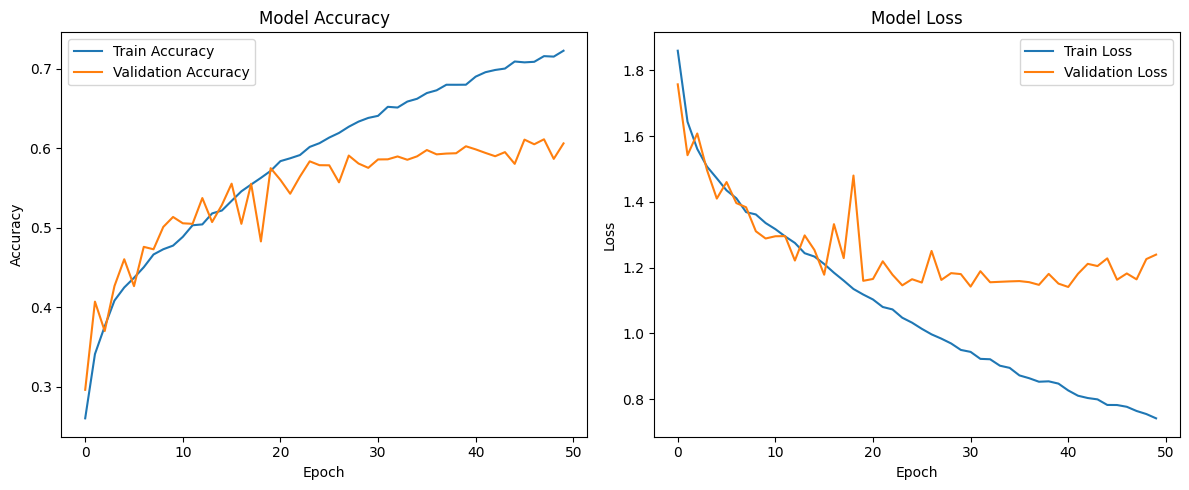

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6088 - loss: 1.1905
Test Accuracy: 0.6062
Test Loss: 1.2394


In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# === STEP 1: Pick a random image from test folder ===
random_emotion = random.choice(os.listdir(test_dir))
emotion_folder = os.path.join(test_dir, random_emotion)
img_file = random.choice(os.listdir(emotion_folder))
img_path = os.path.join(emotion_folder, img_file)

# === STEP 2: Load and preprocess image ===
img = image.load_img(img_path, color_mode='grayscale', target_size=(48, 48))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # (1, 48, 48, 1)

# === STEP 3: Predict the class ===
class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())  # reverse mapping

pred = model.predict(img_array)
predicted_class_index = np.argmax(pred)
predicted_label = labels[predicted_class_index]

# === STEP 4: Display image and results ===
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_label}", fontsize=14)
plt.axis('off')
plt.show()

# === STEP 5: Print predicted and actual labels ===
print("Actual Label (Folder Name):", random_emotion)
print("Predicted Label (Model):", predicted_label)


NameError: name 'test_dir' is not defined

# New Section

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# === STEP 1: Manually input the emotion class (must match test folder name) ===
emotion_name = input("Enter emotion name (e.g., happy, sad, angry, surprise): ").strip().lower()

# === STEP 2: Validate and build path ===
emotion_folder = os.path.join(test_dir, emotion_name)

if not os.path.exists(emotion_folder):
    print(f"Emotion '{emotion_name}' not found in test dataset.")
else:
    # Pick a random image from the chosen emotion folder
    img_file = random.choice(os.listdir(emotion_folder))
    img_path = os.path.join(emotion_folder, img_file)

    # === STEP 3: Load and preprocess the image ===
    img = image.load_img(img_path, color_mode='grayscale', target_size=(48, 48))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 48, 48, 1)

    # === STEP 4: Predict ===
    class_indices = train_generator.class_indices
    labels = dict((v, k) for k, v in class_indices.items())  # Reverse mapping

    pred = model.predict(img_array)
    predicted_index = np.argmax(pred)
    predicted_label = labels[predicted_index]

    # === STEP 5: Display image and prediction ===
    plt.imshow(img, cmap='gray')

    plt.title(f"Predicted: {predicted_label}", fontsize=14)
    plt.axis('off')
    plt.show()

    print("Input Emotion (Folder):", emotion_name)
    print("Predicted Emotion (Model):", predicted_label)
